Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Dataset

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
#Display the first five records of data
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
#Display the last five records of data
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
#number of rows and columns
df.shape

(1338, 7)

In [6]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#list the type of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [8]:
#summary of the dataset
df.describe(include="all")

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [9]:
# check the missing value of dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:
# drop the duplicates
df=df.drop_duplicates()

In [11]:
df.shape

(1337, 7)

Data Visualization

Univariate Analysis

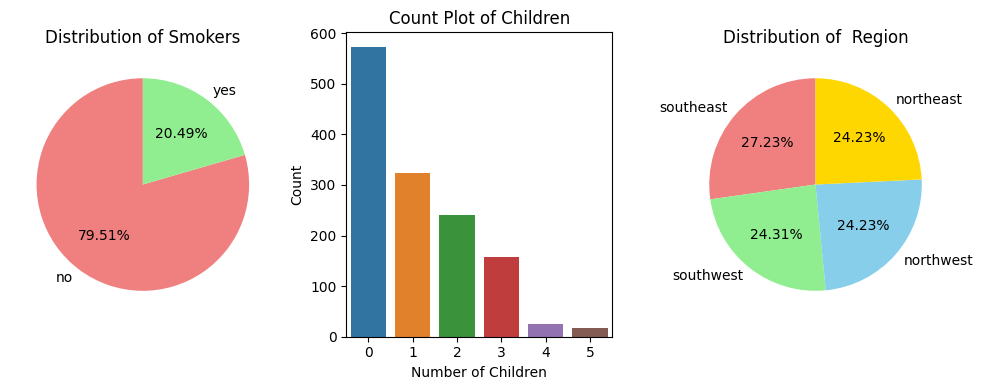

In [12]:
#pie chart for smoker column
smoker=df['smoker'].value_counts()
label_smoker=smoker.index
size_smoker=smoker.values
#count plot for children column
children=df['children'].value_counts()
label_children=children.index
size_children=children.values

#piechart for region column
region=df['region'].value_counts()
label_region=region.index
size_region=region.values

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
                                        

# Pie chart for 'Smoker' column
axes[0].pie(size_smoker, labels=label_smoker, autopct='%1.2f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
axes[0].set_title('Distribution of Smokers')

# Count plot for 'Children' column
sns.countplot(x='children',data=df,order=label_children,ax=axes[1])
axes[1].set_title('Count Plot of Children')
axes[1].set_xlabel('Number of Children')
axes[1].set_ylabel('Count')

# Pie chart for 'Region' column
axes[2].pie(size_region, labels=label_region, autopct='%1.2f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'skyblue', 'gold'])
axes[2].set_title('Distribution of  Region')

# Adjust layout
plt.tight_layout()
plt.show()


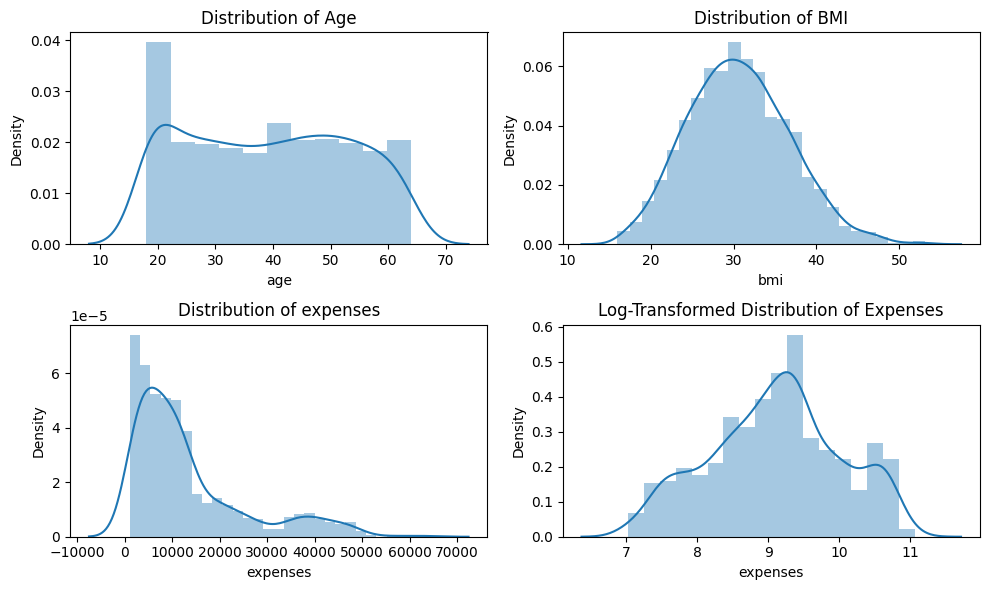

In [13]:


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Distribution plot for 'Age'
sns.distplot(df['age'],kde=True,ax=axes[0,0])
axes[0,0].set_title('Distribution of Age')

# Distribution plot for 'BMI'
sns.distplot(df['bmi'], kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribution of BMI')
# Distribution plot for 'Expenses'
sns.distplot(df['expenses'],kde=True,ax=axes[1,0])
axes[1,0].set_title('Distribution of expenses')

# Log-transformed distribution plot for 'Expenses'
sns.distplot(np.log1p(df['expenses']), kde=True, ax=axes[1,1])
axes[1,1].set_title('Log-Transformed Distribution of Expenses')

# Adjust layout
plt.tight_layout()
plt.show()


Bivariate Analysis

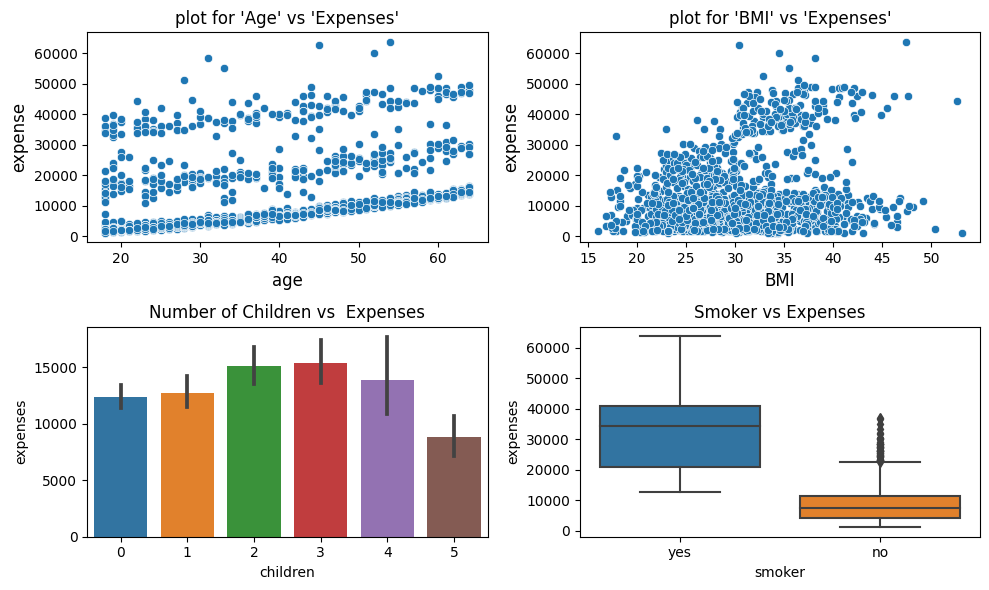

In [14]:
# Scatter plot for 'Age' vs 'Expenses'
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(df['age'],df['expenses'],ax=axes[0,0])
axes[0,0].set_xlabel("age",fontsize=12)
axes[0,0].set_ylabel("expense",fontsize=12)
axes[0,0].set_title("plot for 'Age' vs 'Expenses'")
axes[0,0].grid
# Scatter plot for 'BMI' vs 'Expenses'
sns.scatterplot(df['bmi'],df['expenses'],ax=axes[0,1])
axes[0,1].set_xlabel("BMI",fontsize=12)
axes[0,1].set_ylabel("expense",fontsize=12)
axes[0,1].set_title("plot for 'BMI' vs 'Expenses'")
axes[0,1].grid
#Bar plot for 'Children' vs 'Expenses'
sns.barplot(x=df['children'],y=df['expenses'],ax=axes[1,0])
axes[1,0].set_title('Number of Children vs  Expenses')
#Box plot for 'Smoker' vs 'Expenses'
sns.boxplot(x=df['smoker'],y=df['expenses'],ax=axes[1,1])
axes[1,1].set_title('Smoker vs Expenses')
plt.tight_layout()
plt.show()

Using Heatmap

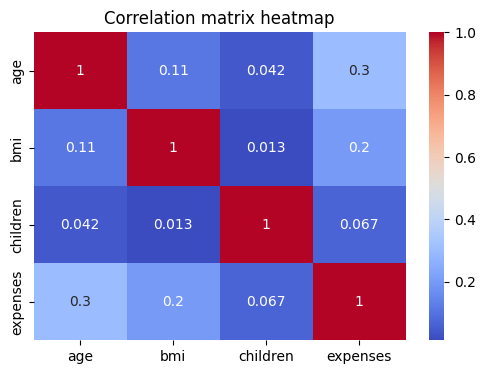

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation matrix heatmap")
plt.show() 

Data Preprocessing

Encoding of catagorical column

In [16]:
df['sex']=df['sex'].map({"female":0,"male":1})
df['smoker']=df['smoker'].map({"no":0,"yes":1})
df["region"]=df["region"].map({"southwest":1,"southeast":2,"northwest":3,"northeast":4})
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


Train test split

In [17]:
x=df.drop(['expenses'], axis=1)
y=df['expenses']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Feature Scaling

In [18]:
# Initialize the StandardScaler
scalar=StandardScaler()
# Fit and transform the training data
x_train_scaled=scalar.fit_transform(x_train)
# Transform the testing data using the previously learned scaling parameters
x_test_Scaled=scalar.fit_transform(x_test)

Hypothesis Testing

1.t-test

In [19]:
# Separate expenses based on sex
male_expense=df[df['sex']==0]['expenses']
female_expense=df[df['sex']==1]['expenses']
# Perform t-test 
sex_ttest,p_value_Sex=ttest_ind(male_expense,female_expense)
# Print the results
print(f"T-test results for Sex: t-statistic = {sex_ttest}, p-value = {p_value_Sex}")
#Separate expenses based on smoker status
smoker_expense=df[df['smoker']==1]['expenses']
non_smoker_expense=df[df['smoker']==0]['expenses']
# Perform t-test 
smoker_ttest,p_value_smoker=ttest_ind(smoker_expense,non_smoker_expense)
# Print the results
print(f"T-test results for Smoker: t-statistic = {smoker_ttest}, p-value = {p_value_smoker}")


T-test results for Sex: t-statistic = -2.1243916010309483, p-value = 0.03382076738656679
T-test results for Smoker: t-statistic = 46.64479451267084, p-value = 1.406724235056543e-282


2.Anova

In [20]:

# Separate expenses based on the number of children
expenses_child_0 = df[df['children'] == 0]['expenses']
expenses_child_1 = df[df['children'] == 1]['expenses']
expenses_child_2 = df[df['children'] == 2]['expenses']
expenses_child_3 = df[df['children'] == 3]['expenses']

# Perform ANOVA for children
f_stat_child, p_value_child = f_oneway(expenses_child_0, expenses_child_1, expenses_child_2, expenses_child_3)

# Print the results
print(f"ANOVA results for Children: F-statistic = {f_stat_child}, p-value = {p_value_child}")

# Separate expenses based on the region
expenses_region_4 = df[df['region'] == 4]['expenses']
expenses_region_3 = df[df['region'] == 3]['expenses']
expenses_region_2 = df[df['region'] == 2]['expenses']
expenses_region_1 = df[df['region'] == 1]['expenses']

# Perform ANOVA for region
f_stat_region, p_value_region = f_oneway(expenses_region_4, expenses_region_3, expenses_region_2, expenses_region_1)

# Print the results
print(f"ANOVA results for Region: F-statistic = {f_stat_region}, p-value = {p_value_region}")


ANOVA results for Children: F-statistic = 4.499396378296922, p-value = 0.0037874717245250686
ANOVA results for Region: F-statistic = 2.9261396851976667, p-value = 0.032762889917839474


3.Chi-Square Test

In [21]:

# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['smoker'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square test results: Chi2-statistic = {chi2_stat}, p-value = {p_value}")

# Check for significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between Sex and Smoker.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Sex and Smoker.")


Chi-square test results: Chi2-statistic = 7.469139330086637, p-value = 0.0062765550120107375
Reject the null hypothesis. There is a significant association between Sex and Smoker.


Model Building

1.Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [23]:

# evaluating metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mae=mean_absolute_error(y_test,prediction).round(3)
mse=mean_squared_error(y_test,prediction).round(3)
rmse=np.sqrt(mse).round(3)
r2=r2_score(y_test,prediction).round(3)
print(f"mean absolute error: {mae}")
print(f"mean squared error : {mse}")
print(f"root mean squared error: {rmse}")
print(f"r2_score: {r2}")

mean absolute error: 4182.597
mean squared error : 35496521.901
root mean squared error: 5957.896
r2_score: 0.807


In [24]:
df_1 = pd.DataFrame({'Actual':y_test,'Predicted':prediction,'Variance':y_test-prediction})
df_1.head()

,Actual,Predicted,Variance
900,8688.86,8072.773331,616.086669
1064,5708.87,5592.826031,116.043969
1256,11436.74,14384.173654,-2947.433654
298,38746.36,31735.184973,7011.175027
237,4463.21,9163.154452,-4699.944452


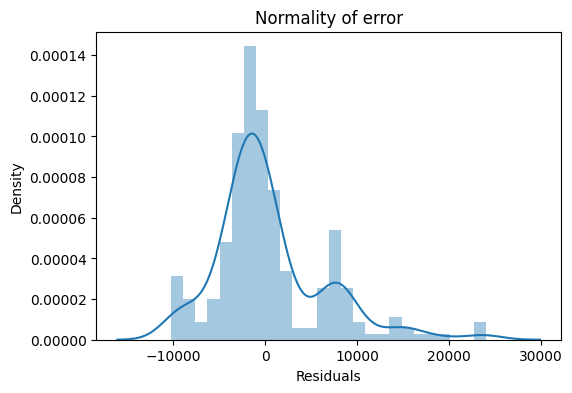

In [25]:
# Distribution of errors

plt.figure(figsize=(6, 4))
sns.distplot(df_1['Variance'], kde=True)
plt.title('Normality of error')
plt.xlabel("Residuals")
plt.show()

In [26]:
import statsmodels.api as sm

x_train_with_const = sm.add_constant(x_train_scaled)  
# Fit the linear regression model using statsmodels
model_stats = sm.OLS(y_train, x_train_with_const).fit()

# Print the summary of the linear regression model
print(model_stats.summary())


                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     477.9
Date:                Tue, 06 Feb 2024   Prob (F-statistic):          1.41e-297
Time:                        15:30:19   Log-Likelihood:                -10831.
No. Observations:                1069   AIC:                         2.168e+04
Df Residuals:                    1062   BIC:                         2.171e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.303e+04    186.659     69.808      0.0

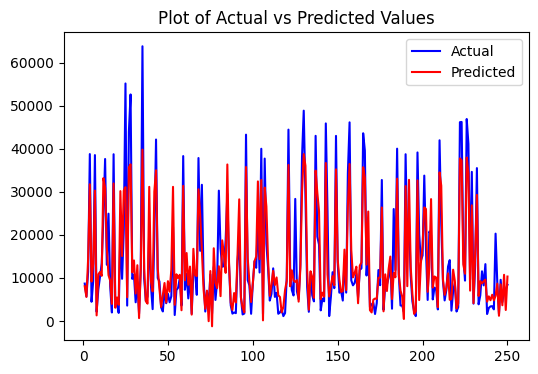

In [27]:
c = np.arange(1, 251, 1)
plt.figure(figsize=(6,4))
plt.plot(c, y_test[:250], color='blue', label='Actual')
plt.plot(c, prediction[:250], color='red', label='Predicted')
plt.title("Plot of Actual vs Predicted Values")
plt.legend()
plt.show()

Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)
rf_mae=mean_absolute_error(y_test,y_pred).round(3)
rf_mse=mean_squared_error(y_test,y_pred).round(3)
rf_rmse=np.sqrt(rf_mse).round(3)
rf_r2=r2_score(y_test,y_pred).round(3)
print(f"mean absolute error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"r2_score: {rf_r2}")


mean absolute error: 2574.416
Mean Squared Error: 21561966.732
Root Mean Squared Error: 4643.486
r2_score: 0.883


Text(0.5, 1.0, 'plot of actual v/s predicted')

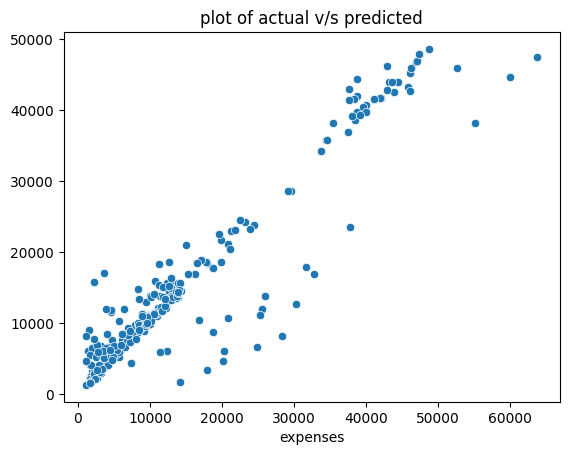

In [29]:
sns.scatterplot(y_test, y_pred)
plt.title('plot of actual v/s predicted')


    Feature  Importance
4    smoker    0.600777
2       bmi    0.214487
0       age    0.136957
3  children    0.023320
5    region    0.016861
1       sex    0.007597


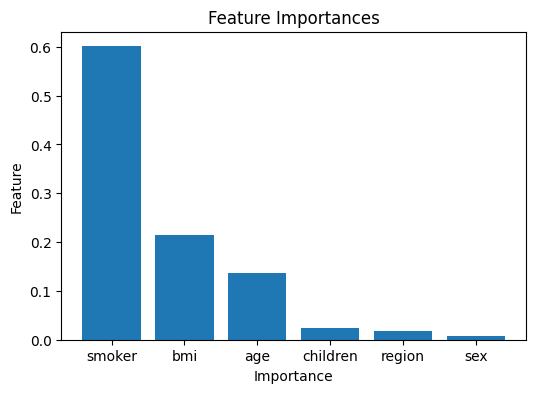

In [30]:

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf_regressor.feature_importances_
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(6, 4))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


Gradient Boosting Regressor

In [31]:
from sklearn.ensemble import GradientBoostingRegressor


# Create a Gradient Boosting Regressor model
model_1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model_1.fit(x_train, y_train)

# Make predictions on the test set
y_pred_1 = model_1.predict(x_test)

# Evaluate the model
gb_mae=mean_absolute_error(y_test,y_pred_1).round(3)
gb_mse = mean_squared_error(y_test, y_pred_1).round(3)
gb_rmse = np.sqrt(gb_mse).round(3)
gb_r2 = r2_score(y_test, y_pred_1).round(3)
print(f"mean absolute error: {gb_mae}")
print(f"Mean Squared Error: {gb_mse}")
print(f"Root Mean Squared Error: {gb_rmse}")
print(f"R2 Score: {gb_r2}")


mean absolute error: 2614.257
Mean Squared Error: 19015953.758
Root Mean Squared Error: 4360.729
R2 Score: 0.897


<AxesSubplot:xlabel='expenses'>

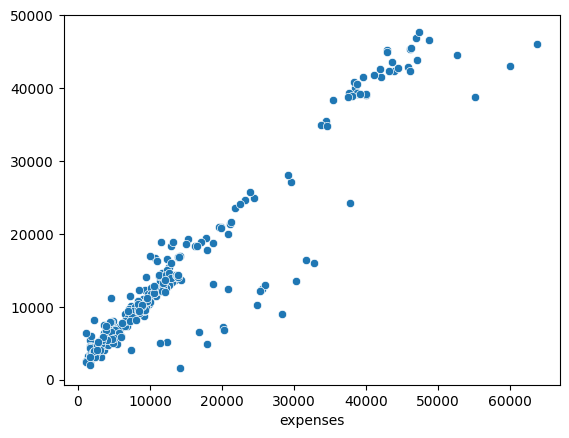

In [32]:
sns.scatterplot(y_test,y_pred_1)

    Feature  Importance
4    smoker    0.674905
2       bmi    0.184794
0       age    0.122451
3  children    0.013520
5    region    0.003275
1       sex    0.001056


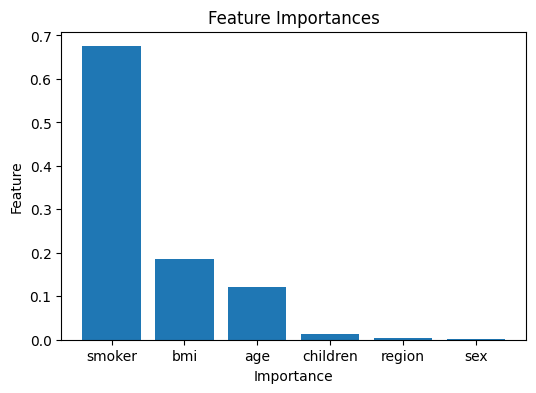

In [33]:
# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model_1.feature_importances_
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(6, 4))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Cross-validation

In [34]:
from sklearn.model_selection import cross_val_score

# Linear Regression
linear_reg_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
mean_linear_reg_cv_score = np.mean(linear_reg_cv_scores)

# Random Forest Regressor
rf_cv_scores = cross_val_score(rf_regressor, x_train, y_train, cv=5, scoring='r2')
mean_rf_cv_score = np.mean(rf_cv_scores)

# Gradient Boosting Regressor
gb_cv_scores = cross_val_score(model_1, x_train, y_train, cv=5, scoring='r2')
mean_gb_cv_score = np.mean(gb_cv_scores)

# Display the mean cross-validation scores
print("Mean Cross-Validation Score (Linear Regression):", mean_linear_reg_cv_score)
print("Mean Cross-Validation Score (Random Forest):", mean_rf_cv_score)
print("Mean Cross-Validation Score (Gradient Boosting):", mean_gb_cv_score)

# Choose the model with the highest mean cross-validation score
best_model = None
best_score = None

if mean_linear_reg_cv_score >= mean_rf_cv_score and mean_linear_reg_cv_score >= mean_gb_cv_score:
    best_model = model
    best_score = mean_linear_reg_cv_score
    print("Best Model: Linear Regression")

elif mean_rf_cv_score >= mean_linear_reg_cv_score and mean_rf_cv_score >= mean_gb_cv_score:
    best_model = rf_regressor
    best_score = mean_rf_cv_score
    print("Best Model: Random Forest Regressor")

else:
    best_model = model_1
    best_score = mean_gb_cv_score
    print("Best Model: Gradient Boosting Regressor")

# Train the best model on the entire training set
best_model.fit(x_train, y_train)

# Evaluate the best model on the test set
test_score = best_model.score(x_test, y_test)
print("Test Set Score (R2):", test_score)


Mean Cross-Validation Score (Linear Regression): 0.7258781126131924
Mean Cross-Validation Score (Random Forest): 0.8162706799805953
Mean Cross-Validation Score (Gradient Boosting): 0.8338863637912048
Best Model: Gradient Boosting Regressor
Test Set Score (R2): 0.8965152339546963


Comparing Three models

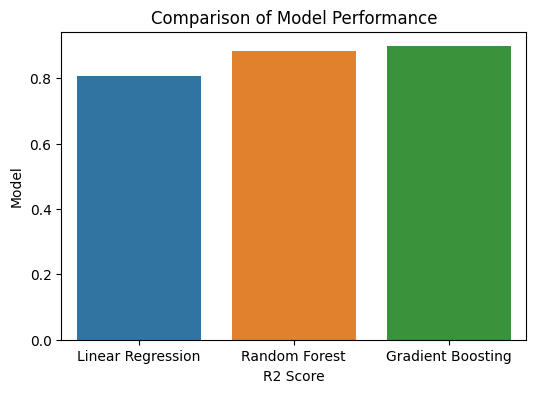

In [35]:


# Create arrays for R2 scores and labels
r2_scores = np.array([r2, rf_r2, gb_r2])
model_labels = ['Linear Regression', 'Random Forest', 'Gradient Boosting']

# Sort indices based on R2 scores
sorted_indices = np.argsort(r2_scores)

# Plotting using seaborn
plt.figure(figsize=(6,4))
sns.barplot(x=np.array(model_labels)[sorted_indices], y=r2_scores[sorted_indices])
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.title('Comparison of Model Performance')
plt.grid
plt.show()


In [36]:
df_2 = pd.DataFrame({'Model': np.array(model_labels)[sorted_indices], 'R2 Score': r2_scores[sorted_indices]})
df_2

,Model,R2 Score
0,Linear Regression,0.807
1,Random Forest,0.883
2,Gradient Boosting,0.897


Predicting cost for new person

In [37]:
new_data={'age':38,
          'sex':0,
          'bmi':43.5,
          'children':1,
          'smoker':0,
          'region':2}
new_df=pd.DataFrame(new_data,index=[0])
new_df

,age,sex,bmi,children,smoker,region
0,38,0,43.5,1,0,2


In [38]:
new_prediction=model_1.predict(new_df)
new_prediction

array([5559.65507777])

In [39]:
import joblib
joblib.dump(model, 'trained_model.joblib_1')

['trained_model.joblib_1']

In [41]:
model_1=joblib.load('trained_model.joblib_1')

In [ ]:
model_1.predict(new_df)

array([12065.12716332])